Data science plays a vital role in how we understand and react to real-world situations. It can help us understand the likelihood of an event occurring and inform decisions about how to respond to that event. Being able to understand data is particularly important in the fields of health and science. In this case study, you'll use Random Forest and logistic regression to understand the scope of the Coronavirus using data from December and January of 2020. This case study is an excellent example of how data scientists can help share crucial insights about occurrences that have an impact around the world. 

## Random Forest

Random Forest is an ensemble of Decision Trees. With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following `BaggingClassifier` is roughly equivalent to the previous `RandomForestClassifier`. Run the cell below to visualize a single estimator from a random forest model, using the Iris dataset to classify the data into the appropriate species.

In [2]:
'''
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])



# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
'''

"\nfrom sklearn.datasets import load_iris\niris = load_iris()\n\n# Model (can also use single decision tree)\nfrom sklearn.ensemble import RandomForestClassifier\nmodel = RandomForestClassifier(n_estimators=10)\n\n# Train\nmodel.fit(iris.data, iris.target)\n# Extract single tree\nestimator = model.estimators_[5]\n\nfrom sklearn.tree import export_graphviz\n# Export as dot file\nexport_graphviz(estimator, out_file='tree.dot', \n                feature_names = iris.feature_names,\n                class_names = iris.target_names,\n                rounded = True, proportion = False, \n                precision = 2, filled = True)\n\n# Convert to png using system command (requires Graphviz)\nfrom subprocess import call\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])\n\n\n\n# Display in jupyter notebook\nfrom IPython.display import Image\nImage(filename = 'tree.png')\n"

In [526]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [527]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is F666-5589

 Directory of C:\Users\mkoba\Springboard_jupyternotebook\Data Science Career track course\14.4.4 Case Study - Random Forest

02/20/2021  01:14 PM    <DIR>          .
02/20/2021  01:14 PM    <DIR>          ..
02/09/2021  07:43 PM    <DIR>          .ipynb_checkpoints
02/09/2021  07:43 PM            24,183 RandomForest_casestudy_covid19.ipynb
02/20/2021  01:14 PM           550,412 RandomForest_casestudy_covid19_mk.ipynb
02/09/2021  07:43 PM    <DIR>          SouthKoreacoronavirusdataset
02/20/2021  01:14 PM             1,818 tree.dot
02/15/2021  08:59 PM           151,729 tree.png
               4 File(s)        728,142 bytes
               4 Dir(s)  168,159,272,960 bytes free


In [528]:
# Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# this 'call module' does not work in windows (still have bugs)
# instead copy and paste 'dot -Tpng tree.dot -o tree.png' in anaconda command prompt 
# (go down to the folder where I am runnign the jupyternotebook.) refer to the cell below

# refer to 'https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html'
#$ dot -Tps tree.dot -o tree.ps      (PostScript format)
#$ dot -Tpng tree.dot -o tree.png    (PNG format)
# refer to 'https://stackoverflow.com/questions/1494492/graphviz-how-to-go-from-dot-to-a-graph'
#dot -Tps filename.dot -o outfile.ps

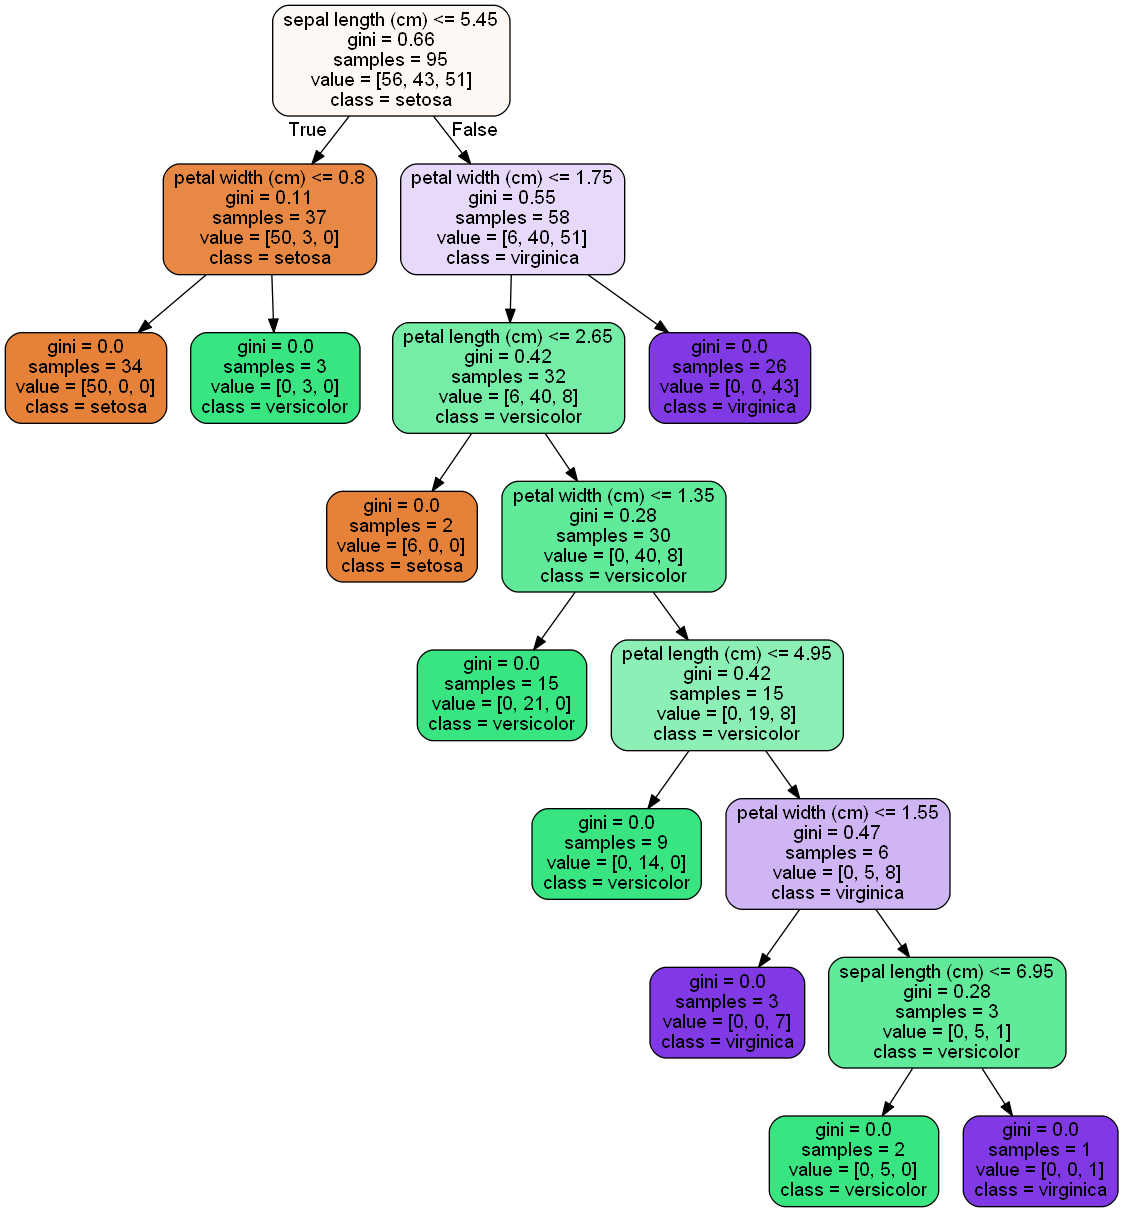

In [529]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Notice how each split seperates the data into buckets of similar observations. This is a single tree and a relatively simple classification dataset, but the same method is used in a more complex dataset with greater depth to the trees.

## Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project was continuing to spread throughout the world. Many governments recommended only essential outings to public places and closed most business that do not serve food or sell essential items. An excellent [spatial dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) built by Johns Hopkins shows the daily confirmed cases by country. 

This case study was designed to drive home the important role that data science plays in real-world situations like this pandemic. This case study uses the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on [Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset) to encourage research on this important topic. **The goal of the case study is to build a Random Forest Classifier to predict the 'state' of the patient.**

First, please load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [530]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
# look up python magic line/formula 'inline'
#%%%%%% what the code above do? '%matplotlib inline'?
import plotly.graph_objects as go # new module to me
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [531]:
#how to install plotly via anaconda!??
# conda install -c conda-forge plotly=4.14.3 > this code in anaconda prompt worked!!
# refer to 'https://plotly.com/python/getting-started/' > conda install -c plotly plotly=4.14.3

In [532]:
url ='SouthKoreacoronavirusdataset/PatientInfo.csv'
df = pd.read_csv(url)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [533]:
df.shape

(2218, 18)

In [534]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
# refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html'
# When we reset the index, the old index is added as a column, and a new sequential index is used
print(na_df) # MK code
na_df.columns = ['VarName', 'NullCount']
print(na_df) # MK code
na_df[(na_df['NullCount']>0)]

                 index     0
0              disease  2199
1        deceased_date  2186
2      infection_order  2176
3   symptom_onset_date  2025
4        released_date  1995
5       contact_number  1807
6          infected_by  1749
7       infection_case  1055
8           global_num   904
9           birth_year   454
10                 age   261
11                 sex   145
12      confirmed_date   141
13               state    88
14                city    65
15             country     0
16            province     0
17          patient_id     0
               VarName  NullCount
0              disease       2199
1        deceased_date       2186
2      infection_order       2176
3   symptom_onset_date       2025
4        released_date       1995
5       contact_number       1807
6          infected_by       1749
7       infection_case       1055
8           global_num        904
9           birth_year        454
10                 age        261
11                 sex        145
12     

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [535]:
#counts of response variable values
df.state.value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

 **<font color='teal'> Create a new column named 'n_age' which is the calculated age based on the birth year column.</font>**

In [536]:
df['n_age'] = 2020 - df['birth_year']
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,56.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,33.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,56.0
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,29.0
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,28.0


### Handle Missing Values

 **<font color='teal'> Print the number of missing values by column.</font>**

In [537]:
na_df 

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

 **<font color='teal'> Fill the 'disease' missing values with 0 and remap the True values to 1.</font>**

In [539]:
# MK code
# check the values in 'disease' column
# refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html'
df.disease.value_counts(dropna=False)

NaN     2199
True      19
Name: disease, dtype: int64

In [540]:
# MK code
2199+19

2218

In [541]:
# use list comprehension
df['disease'] = [1 if row == True else 0 for row in df.disease]
df.disease.value_counts(dropna=False)

0    2199
1      19
Name: disease, dtype: int64

 **<font color='teal'> Fill null values in the following columns with their mean: 'global_num','birth_year','infection_order','infected_by'and 'contact_number'</font>**

In [542]:
# MK code
df[['global_num','birth_year','infection_order','infected_by', 'contact_number']].head()

,global_num,birth_year,infection_order,infected_by,contact_number
0,2.0,1964.0,1.0,NaN,75.0
1,5.0,1987.0,1.0,NaN,31.0
2,6.0,1964.0,2.0,2.002000e+09,17.0
3,7.0,1991.0,1.0,NaN,9.0
4,9.0,1992.0,2.0,1.000000e+09,2.0


In [543]:
# refer to '6_GuidedCapstone/04_preprocessing_and_training_mk'
# refer to 'Speed dating_3_preprocessing & training_mk'
df[['global_num','birth_year','infection_order','infected_by', 'contact_number']]= df[['global_num','birth_year','infection_order','infected_by', 'contact_number']].fillna(df[['global_num','birth_year','infection_order','infected_by', 'contact_number']].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          2218 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          2218 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             2218 non-null   int64  
 9   infection_case      1163 non-null   object 
 10  infection_order     2218 non-null   float64
 11  infected_by         2218 non-null   float64
 12  contact_number      2218 non-null   float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [544]:
# MK code
# for loop works too
'''
for i in ['global_num','birth_year','infection_order','infected_by', 'contact_number']:
    df[i] = df[i].fillna(df[i].mean())
df.info()
'''

"\nfor i in ['global_num','birth_year','infection_order','infected_by', 'contact_number']:\n    df[i] = df[i].fillna(df[i].mean())\ndf.info()\n"

 **<font color='teal'> Fill the rest of the missing values with any method.</font>**

In [545]:
# fill the rest of the columns with mean for now.
df = df.fillna(df.mean())

 **<font color='teal'> Check for any remaining null values.</font>**

In [546]:
df.info() #%%%%% how are we going to deal with the missing values in object columns!??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          2218 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          2218 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             2218 non-null   int64  
 9   infection_case      1163 non-null   object 
 10  infection_order     2218 non-null   float64
 11  infected_by         2218 non-null   float64
 12  contact_number      2218 non-null   float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [547]:
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,2.600789e+09,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,56.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,2.600789e+09,31.0,NaN,2020-01-30,2020-03-02,NaN,released,33.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,0,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,56.0
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,0,overseas inflow,1.0,2.600789e+09,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,29.0
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,0,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,28.0


Remove date columns from the data.


In [548]:
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'],axis =1)

Review the count of unique values by column.

In [549]:
print(df.nunique())

patient_id         2218
global_num         1304
sex                   2
birth_year           97
age                  11
country               4
province             17
city                134
disease               2
infection_case       16
infection_order       7
infected_by         207
contact_number       73
state                 3
n_age                97
dtype: int64


Review the percent of unique values by column.

In [550]:
print(df.nunique()/df.shape[0])

patient_id         1.000000
global_num         0.587917
sex                0.000902
birth_year         0.043733
age                0.004959
country            0.001803
province           0.007665
city               0.060415
disease            0.000902
infection_case     0.007214
infection_order    0.003156
infected_by        0.093327
contact_number     0.032913
state              0.001353
n_age              0.043733
dtype: float64


Review the range of values per column.

In [551]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2218.0,4.014678e+09,2.192419e+09,1.000000e+09,1.700000e+09,6.001000e+09,6.004000e+09,7.000000e+09
global_num,2218.0,4.664817e+03,2.211785e+03,1.000000e+00,4.205250e+03,4.664817e+03,5.900250e+03,8.717000e+03
birth_year,2218.0,1.974989e+03,1.731123e+01,1.916000e+03,1.965000e+03,1.974989e+03,1.988000e+03,2.020000e+03
disease,2218.0,8.566276e-03,9.217769e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
infection_order,2218.0,2.285714e+00,1.706622e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,2218.0,2.600789e+09,7.216328e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number,2218.0,2.412895e+01,3.917141e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.160000e+03
n_age,2218.0,4.501134e+01,1.731123e+01,0.000000e+00,3.200000e+01,4.501134e+01,5.500000e+01,1.040000e+02


### Check for duplicated rows

In [552]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age


Print the categorical columns and their associated levels.

In [553]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
print(dfo.shape)
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn #%%%%% what is this info useful for modeling? or just good to know

(2218, 7)


,VarName,LevelsCount
0,sex,2
1,age,11
2,country,4
3,province,17
4,city,134
5,infection_case,16
6,state,3


**<font color='teal'> Plot the correlation heat map for the features.</font>**

<AxesSubplot:>

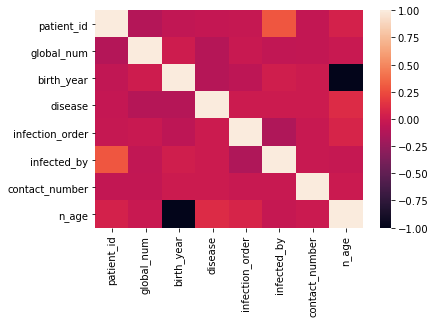

In [554]:
# refer to 'https://seaborn.pydata.org/generated/seaborn.heatmap.html'
# refer to 'Speed dating_2_EDA_mk'
sns.heatmap(df.corr(), xticklabels=True, yticklabels=True)

**<font color='teal'> Plot the boxplots to check for outliers. </font>**

<AxesSubplot:>

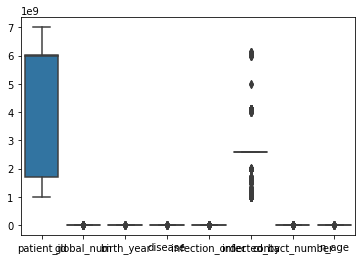

In [555]:
#%%%%% which columns to plot?
# refer to 'https://seaborn.pydata.org/generated/seaborn.boxplot.html'
sns.boxplot(data=df)
#sns.boxplot(data=iris, orient="h", palette="Set2")

In [556]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'state', 'n_age'],
      dtype='object')

In [557]:
df.describe().columns

Index(['patient_id', 'global_num', 'birth_year', 'disease', 'infection_order',
       'infected_by', 'contact_number', 'n_age'],
      dtype='object')

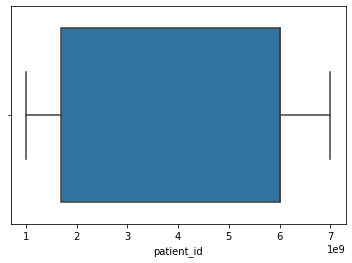

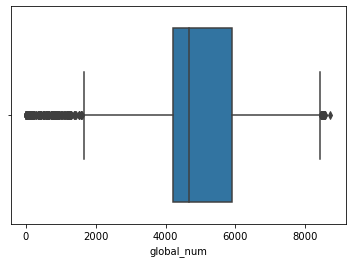

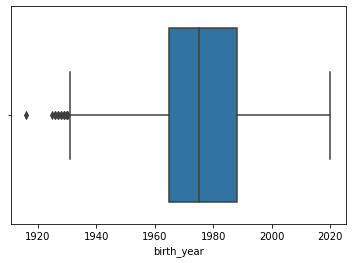

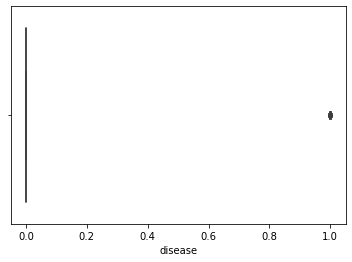

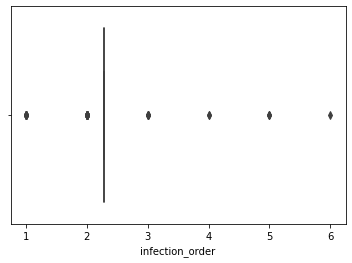

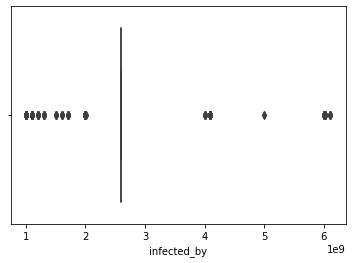

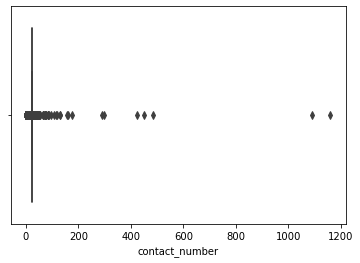

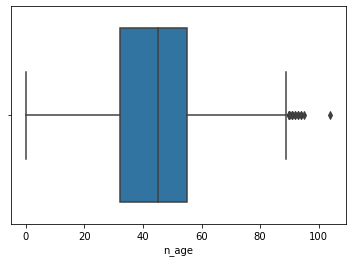

In [558]:
for column in df.describe().columns:
    sns.boxplot(data=df, x=column)
    plt.show()

In [559]:
len(df.describe().columns)

8

In [560]:
np.arange(1,9)

array([1, 2, 3, 4, 5, 6, 7, 8])

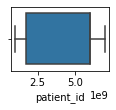

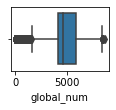

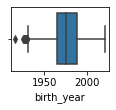

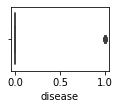

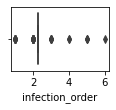

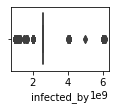

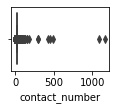

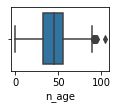

In [561]:
#%%%% anyway to put those plot in on one nice subplots?! > little hard to figure it out. Leave it for now.
# refer to 'https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.subplot.html'
i=1
if i < 9:
    for column in df.describe().columns:
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, x=column)
        i =+ 1
        plt.show()
# won't help it here but FacetGrid is cool tool for sns ploting
# refer to 'https://seaborn.pydata.org/generated/seaborn.FacetGrid.html'

**<font color='teal'> Create dummy features for object type features. </font>**

In [562]:
#$$$$$ always drop the target/dependent variable before strating creating dummy features (this will be used as independent variable X)
# MK code
# cheking df again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       2218 non-null   int64  
 1   global_num       2218 non-null   float64
 2   sex              2073 non-null   object 
 3   birth_year       2218 non-null   float64
 4   age              1957 non-null   object 
 5   country          2218 non-null   object 
 6   province         2218 non-null   object 
 7   city             2153 non-null   object 
 8   disease          2218 non-null   int64  
 9   infection_case   1163 non-null   object 
 10  infection_order  2218 non-null   float64
 11  infected_by      2218 non-null   float64
 12  contact_number   2218 non-null   float64
 13  state            2130 non-null   object 
 14  n_age            2218 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 260.0+ KB


In [563]:
# MK code
# cheking dfo again
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             2073 non-null   object
 1   age             1957 non-null   object
 2   country         2218 non-null   object
 3   province        2218 non-null   object
 4   city            2153 non-null   object
 5   infection_case  1163 non-null   object
 6   state           2130 non-null   object
dtypes: object(7)
memory usage: 121.4+ KB


In [564]:
dfo.shape

(2218, 7)

In [565]:
# refer to '14.1.2_4_Supervised Learning with scikit-learn_Preprocessing and Pipeline'
# refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html'
df_dm = pd.get_dummies(df) # since df's object type features still have many missing data, kept drop_first=False
dfo_dm = pd.get_dummies(dfo) 
# df_dm = pd.get_dummies(df, drop_first=True) 
df_dm.columns, dfo_dm.columns

#%%%%% our dependent/target variable is 'state' columns
# is it ok to get to dummy variable from the dependent variable or I should have left it out!?? > should leave it out

(Index(['patient_id', 'global_num', 'birth_year', 'disease', 'infection_order',
        'infected_by', 'contact_number', 'n_age', 'sex_female', 'sex_male',
        ...
        'infection_case_Shincheonji Church',
        'infection_case_Suyeong-gu Kindergarten',
        'infection_case_contact with patient', 'infection_case_etc',
        'infection_case_gym facility in Cheonan',
        'infection_case_gym facility in Sejong',
        'infection_case_overseas inflow', 'state_deceased', 'state_isolated',
        'state_released'],
       dtype='object', length=195),
 Index(['sex_female', 'sex_male', 'age_0s', 'age_100s', 'age_10s', 'age_20s',
        'age_30s', 'age_40s', 'age_50s', 'age_60s',
        ...
        'infection_case_Shincheonji Church',
        'infection_case_Suyeong-gu Kindergarten',
        'infection_case_contact with patient', 'infection_case_etc',
        'infection_case_gym facility in Cheonan',
        'infection_case_gym facility in Sejong',
        'infection_case

In [566]:
# MK code
df_dm.head()

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex_female,sex_male,...,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow,state_deceased,state_isolated,state_released
0,1000000001,2.0,1964.0,0,1.0,2.600789e+09,75.0,56.0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1000000002,5.0,1987.0,0,1.0,2.600789e+09,31.0,33.0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,1000000003,6.0,1964.0,0,2.0,2.002000e+09,17.0,56.0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1000000004,7.0,1991.0,0,1.0,2.600789e+09,9.0,29.0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1000000005,9.0,1992.0,0,2.0,1.000000e+09,2.0,28.0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [567]:
# MK code
dfo_dm.head()

,sex_female,sex_male,age_0s,age_100s,age_10s,age_20s,age_30s,age_40s,age_50s,age_60s,...,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow,state_deceased,state_isolated,state_released
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [568]:
# MK code
df_dm.shape, dfo_dm.shape

((2218, 195), (2218, 187))

In [569]:
# MK code
# construct new df_odm (df with dummy features for object type features)
# combine df and dfo
df_odm = pd.concat([df,dfo_dm],axis=1)
df_odm.shape
# pd.concat([s,s2],axis=1)

(2218, 202)

In [570]:
# MK code
df.shape[1]+dfo_dm.shape[1] == df_odm.shape[1]

True

In [571]:
# MK code
# need to drop the original column!
df_odm1 = df_odm.drop(columns = dfo.columns)
df_odm1.shape

(2218, 195)

In [572]:
# MK code
df_dm.shape[1] == df_odm1.shape[1]

True

In [573]:
# MK code
df_dm.columns == df_odm1.columns # df_dm = df_odm1 !!

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Split the data into test and train subsamples

In [574]:
# MK code
df.state

0       released
1       released
2       released
3       released
4       released
          ...   
2213         NaN
2214    isolated
2215    released
2216    released
2217    isolated
Name: state, Length: 2218, dtype: object

In [575]:
# MK code
# refer to 'https://stackoverflow.com/questions/24870306/how-to-check-if-a-column-exists-in-pandas'
'state' in df.columns, 'state' in df_dm.columns

(True, False)

In [576]:
# MK code
df_dm.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [577]:
# MK code
df.state.isna().sum() # how to fill the missing state? > check how much data is missing in the column

88

In [578]:
# MK code
(df.state.isna().sum())/df.shape[0]*100 
# since less than 10% data is missing > simply drop the rows from the column for now.

3.967538322813345

In [579]:
# MK code
type(df.state)

pandas.core.series.Series

In [580]:
# MK code
# refer to 'https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/'
# refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html'
df['state'].dropna(inplace=True)
print(df['state'].isna().sum())
#%%%%%% why this code does not work? 
#> if you drop the rows in df.state, the column df.state will be shorter than other columns in df.
# this might be why df does not allow it...

88


In [581]:
# have to extract the column out before dropping NaN
s = df.state
s.dropna(inplace=True)
print(s.isna().sum())

0


In [582]:
# MK code
df.state.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2213     True
2214    False
2215    False
2216    False
2217    False
Name: state, Length: 2218, dtype: bool

In [583]:
# MK code
df.state.notna()

0        True
1        True
2        True
3        True
4        True
        ...  
2213    False
2214     True
2215     True
2216     True
2217     True
Name: state, Length: 2218, dtype: bool

In [584]:
# MK code
# df without rows that have NaN in state column:df1
df1 = df[df['state'].notna()]
df1.state.isna().sum()

0

In [585]:
# MK code
df1.shape

(2130, 15)

In [586]:
# MK code
df_dm.shape[0] == df.shape[0]

True

In [587]:
# MK code
# df_dm without rows that have NaN in state column:df_dm1
df_dm1 = df_dm[df['state'].notna()] #$$$$$ useful code!
df_dm1.isna().sum()

patient_id                               0
global_num                               0
birth_year                               0
disease                                  0
infection_order                          0
                                        ..
infection_case_gym facility in Sejong    0
infection_case_overseas inflow           0
state_deceased                           0
state_isolated                           0
state_released                           0
Length: 195, dtype: int64

In [588]:
# MK code
df_dm1.shape 

(2130, 195)

In [589]:
# MK code
df_dm1.isna().sum().unique()

array([0], dtype=int64)

In [590]:
# MK code
df_dm1.head()

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex_female,sex_male,...,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow,state_deceased,state_isolated,state_released
0,1000000001,2.0,1964.0,0,1.0,2.600789e+09,75.0,56.0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1000000002,5.0,1987.0,0,1.0,2.600789e+09,31.0,33.0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,1000000003,6.0,1964.0,0,2.0,2.002000e+09,17.0,56.0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1000000004,7.0,1991.0,0,1.0,2.600789e+09,9.0,29.0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1000000005,9.0,1992.0,0,2.0,1.000000e+09,2.0,28.0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [591]:
# MK code
# refer to 'https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra'
missing_list = df[df['state'].isnull()].index.tolist()
print(missing_list)
print(len(missing_list))
# refer to 'https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values'

[802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 2213]
88


In [592]:
# MK code
df_dm.loc[missing_list,:]

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex_female,sex_male,...,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow,state_deceased,state_isolated,state_released
802,2000000214,8168.000000,1967.0,0,2.285714,2.000000e+09,2.000000,53.0,1,0,...,0,0,1,0,0,0,0,0,0,0
803,2000000215,8195.000000,1974.0,0,2.285714,2.000000e+09,24.128954,46.0,1,0,...,0,0,1,0,0,0,0,0,0,0
804,2000000216,8212.000000,1963.0,0,2.285714,2.600789e+09,11.000000,57.0,1,0,...,0,0,0,1,0,0,0,0,0,0
805,2000000217,8205.000000,1954.0,0,2.285714,2.000000e+09,24.128954,66.0,1,0,...,0,0,1,0,0,0,0,0,0,0
806,2000000218,8184.000000,1992.0,0,2.285714,2.000000e+09,24.128954,28.0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,2000000297,8473.000000,1969.0,0,2.285714,2.600789e+09,24.128954,51.0,1,0,...,0,0,1,0,0,0,0,0,0,0
886,2000000298,8503.000000,1969.0,0,2.285714,2.000000e+09,24.128954,51.0,1,0,...,0,0,1,0,0,0,0,0,0,0
887,2000000299,4664.816591,1985.0,0,2.285714,2.600789e+09,24.128954,35.0,1,0,...,0,0,0,0,0,0,1,0,0,0
888,2000000300,4664.816591,1989.0,0,2.285714,2.600789e+09,24.128954,31.0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [593]:
# MK code
# Althernative method:
# Use_missing list to remove rows that have NaN in state column from df_dm:df_dm2
df_dm2 = df_dm.drop(index = missing_list) #select index = missing_list
df_dm2.isna().sum()

patient_id                               0
global_num                               0
birth_year                               0
disease                                  0
infection_order                          0
                                        ..
infection_case_gym facility in Sejong    0
infection_case_overseas inflow           0
state_deceased                           0
state_isolated                           0
state_released                           0
Length: 195, dtype: int64

In [594]:
# MK code
df_dm2.shape

(2130, 195)

In [595]:
# MK code
df_dm2.isna().sum().unique()

array([0], dtype=int64)

In [596]:
# MK code
df_dm2.all() == df_dm1.all()

patient_id                               True
global_num                               True
birth_year                               True
disease                                  True
infection_order                          True
                                         ... 
infection_case_gym facility in Sejong    True
infection_case_overseas inflow           True
state_deceased                           True
state_isolated                           True
state_released                           True
Length: 195, dtype: bool

In [597]:
# dont forget to define your X and y
#%%%%%% is this definition right?
X = df_dm1 #%%%%% this contains the dummy varibles created from our dependent variable, df.state, is it ok? > not it's not!!
y = df1.state
print(X.shape)
X.head()

(2130, 195)


,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex_female,sex_male,...,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow,state_deceased,state_isolated,state_released
0,1000000001,2.0,1964.0,0,1.0,2.600789e+09,75.0,56.0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1000000002,5.0,1987.0,0,1.0,2.600789e+09,31.0,33.0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,1000000003,6.0,1964.0,0,2.0,2.002000e+09,17.0,56.0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1000000004,7.0,1991.0,0,1.0,2.600789e+09,9.0,29.0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1000000005,9.0,1992.0,0,2.0,1.000000e+09,2.0,28.0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [598]:
# removing the last three dummy varibles created from our dependent variable, df.state
X1 = X.iloc[:,:192] 
print(X1.shape)
X1.head()

(2130, 192)


,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex_female,sex_male,...,infection_case_Pilgrimage to Israel,infection_case_River of Grace Community Church,infection_case_Seongdong-gu APT,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow
0,1000000001,2.0,1964.0,0,1.0,2.600789e+09,75.0,56.0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1000000002,5.0,1987.0,0,1.0,2.600789e+09,31.0,33.0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1000000003,6.0,1964.0,0,2.0,2.002000e+09,17.0,56.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1000000004,7.0,1991.0,0,1.0,2.600789e+09,9.0,29.0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1000000005,9.0,1992.0,0,2.0,1.000000e+09,2.0,28.0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [599]:
# Split the data into test and train subsamples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.2, random_state=1)

In [600]:
# Cleaner way to Create dummy features for object type features!!
#1. drop the rows with missing data in the target categorical variable, df.state from entire df: df1
#2. remove the df.state from the df and then create dummy variales: df1_dm
#3. X = df1_dm, y=df1.state

### Scale data to prep for model creation

In [601]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train) #%%%%%% we never scale/transform y_train, y_test data!!
X_test_scaled=scaler.transform(X_test)

In [602]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

### Fit Random Forest Classifier
The fit model shows an overall accuracy of 80% which is great and indicates our model was effectively able to identify the status of a patients in the South Korea dataset.

In [603]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.869
Random Forest: f1-score=0.853


### Create Confusion Matrix Plots
Confusion matrices are great ways to review your model performance for a multi-class classification problem. Being able to identify which class the misclassified observations end up in is a great way to determine if you need to build additional features to improve your overall model. In the example below we plot a regular counts confusion matrix as well as a weighted percent confusion matrix. The percent confusion matrix is particulary helpful when you have unbalanced class sizes.

In [604]:
class_names=['isolated','released','missing','deceased'] # name of classes

Confusion matrix, without normalization
[[  6   1   0]
 [  0 349  16]
 [  0  39  15]]
Normalized confusion matrix
[[0.86 0.14 0.  ]
 [0.   0.96 0.04]
 [0.   0.72 0.28]]


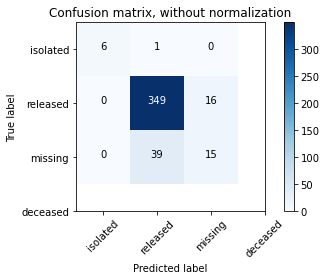

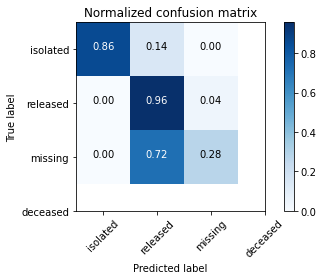

In [605]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

### Plot feature importances
The random forest algorithm can be used as a regression or classification model. In either case it tends to be a bit of a black box, where understanding what's happening under the hood can be difficult. Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.

30


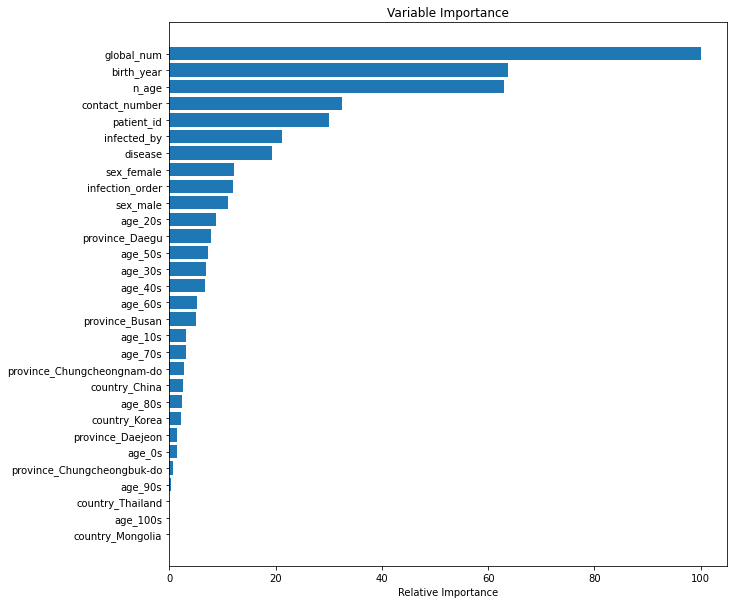

In [606]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The popularity of random forest is primarily due to how well it performs in a multitude of data situations. It tends to handle highly correlated features well, where as a linear regression model would not. In this case study we demonstrate the performance ability even with only a few features and almost all of them being highly correlated with each other.
Random Forest is also used as an efficient way to investigate the importance of a set of features with a large data set. Consider random forest to be one of your first choices when building a decision tree, especially for multiclass classifications.